<a href="https://colab.research.google.com/github/DL4CV-NPTEL/Deep-Learning-For-Computer-Vision/blob/main/notebooks/Week_1/Week_1_Lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 5: Linear Filtering, Correlation, Convolution <sup><mark style="background-color:gold">Code</mark> </sup>

In [1]:
#@title 
from ipywidgets import widgets
out1 = widgets.Output()
with out1:
  from IPython.display import YouTubeVideo
  video = YouTubeVideo(id=f"LiuMJvpSbOU", width=854, height=480, fs=1, rel=0)
  print("Video available at https://youtube.com/watch?v=" + video.id)
  display(video)
display(out1)

Output()

In [2]:
#@title 
from IPython import display as IPyDisplay
IPyDisplay.HTML(
    f"""
  <div>
    <a href= "https://github.com/DL4CV-NPTEL/Deep-Learning-For-Computer-Vision/blob/main/Slides/Week_1/DL4CV_Week01_Part05.pdf" target="_blank">
    <img src="https://github.com/DL4CV-NPTEL/Deep-Learning-For-Computer-Vision/blob/main/Data/Slides_Logo.png?raw=1"
  alt="button link to Airtable" style="width:200px"></a>
    </div>""" )

# Cross- Correlation vs Convolution (using Impulse signal)

**Import libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

**Create a black image with a single white pixel in the middle**

In [4]:
img = np.zeros((7,7))
img[3,3] = 1
img

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

**Plot the image**

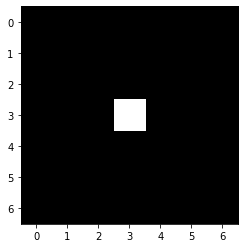

In [5]:
plt.imshow(img,cmap='gray')

**Create a filter that goes from black to white using np.linspace**

In [6]:
filter_ = np.linspace(0,1,9).reshape(3,3)
filter_

array([[0.   , 0.125, 0.25 ],
       [0.375, 0.5  , 0.625],
       [0.75 , 0.875, 1.   ]])

**Plot the filter**

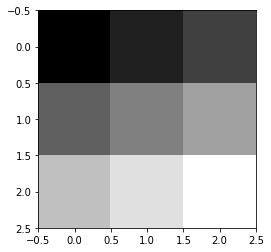

In [7]:
plt.imshow(filter_,cmap='gray')

**Store the filter size and compute value of k** <br>
You can obtain k from the following equation $2*k+1=filter\_size$

In [8]:
filter_size = filter_.shape[0]
k = int((filter_size - 1)/2)

## Cross Correlation

**Empty list to store output image**

In [9]:
corr_out = []

**Compute cross-correlation**

In [10]:
for i in range(k,img.shape[0]-k):
  temp = []
  for j in range(k,img.shape[1]-k):
    mat = img[i-k:i+k+1,j-k:j+k+1]
    temp.append(np.sum(filter_ * mat))
  corr_out.append(temp)  

**Print shape of output image**

In [11]:
corr_out = np.array(corr_out)
corr_out.shape

(5, 5)

**Print values of output image**

In [12]:
corr_out

array([[0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.875, 0.75 , 0.   ],
       [0.   , 0.625, 0.5  , 0.375, 0.   ],
       [0.   , 0.25 , 0.125, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ]])

**Plot the output image** <br>
You will notice that the output is flipped

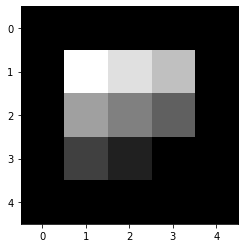

In [13]:
plt.imshow(corr_out,cmap='gray')

## Convolution

**Empty list to store output image**

In [14]:
conv_out = []

**Compute convolution**

In [15]:
for i in range(k,img.shape[0]-k):
  temp = []
  for j in range(k,img.shape[1]-k):
    mat = img[i-k:i+k+1,j-k:j+k+1][::-1,::-1]    # You can also use np.flip
    temp.append(np.sum(filter_ * mat))
  conv_out.append(temp)  

**Print shape of output image**

In [16]:
conv_out = np.array(conv_out)
conv_out.shape

(5, 5)

**Print values of output image**

In [17]:
conv_out

array([[0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.125, 0.25 , 0.   ],
       [0.   , 0.375, 0.5  , 0.625, 0.   ],
       [0.   , 0.75 , 0.875, 1.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ]])

**Plot the output image** <br>
You will notice that output is not flipped for convolution

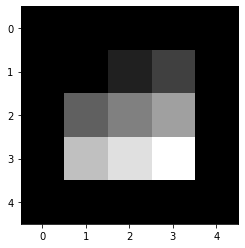

In [18]:
plt.imshow(conv_out,cmap='gray')

# Seperable Convolution

**Initialize a 7x7 random image**

In [19]:
img = np.random.randint(0,256,(7,7))
img

array([[137, 132,  67, 220, 218,  28, 191],
       [176, 202, 250,  90,  82, 109,  79],
       [217, 252, 177, 192, 196, 226, 155],
       [ 78, 100, 196,  67, 113, 139, 104],
       [165,   6, 242, 104, 213, 189,  85],
       [119,  93, 150,  61,  77, 167,  33],
       [ 47, 139,  59,  11, 182, 152, 180]])

**Plot the image**

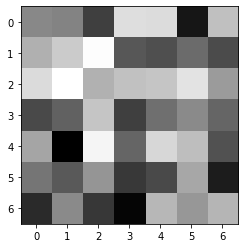

In [20]:
plt.imshow(img,cmap='gray')

## 2D Gaussian kernel

**Initialize a 2D Gaussian kernel**

In [21]:
gaussian_filter_2d =  np.array([[1,2,1],
                              [2,4,2],
                              [1,2,1]])

gaussian_filter_2d = gaussian_filter_2d/16 
gaussian_filter_2d

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

**Plot the 2D Gaussian kernel**

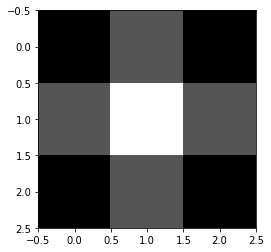

In [22]:
plt.imshow(gaussian_filter_2d,cmap='gray')

**Store the filter size and compute value of k** <br>
You can obtain k from the following equation $2*k+1=filter\_size$

In [23]:
filter_size = gaussian_filter_2d.shape[0]
k = int((filter_size - 1)/2)

**Empty list to store output image after applying 2D Gaussian kernel**

In [24]:
gaussian_2d_out = []

**Apply convolution/cross-correlation on the image using 2D Gaussian kernel.**<br>
Since the kernel is symmetric, convolutiona as well as cross-correlation will yield the same output

In [25]:
for i in range(k,img.shape[0]-k):
  temp = []
  for j in range(k,img.shape[1]-k):
    mat = img[i-k:i+k+1,j-k:j+k+1]
    temp.append(np.sum(gaussian_filter_2d * mat))
  gaussian_2d_out.append(temp) 

**Print output image values after applying 2D Gaussian kernel**

In [26]:
gaussian_2d_out

[[189.125, 179.25, 156.625, 138.75, 126.625],
 [193.75, 184.1875, 154.3125, 150.9375, 155.0],
 [141.5625, 156.875, 144.125, 149.5625, 154.3125],
 [110.4375, 137.5625, 132.375, 140.75, 143.1875],
 [107.0625, 110.625, 101.5, 125.625, 139.375]]

## 1D Gaussian kernels

**Horizontal Gaussian kernel**

In [27]:
gaussian_filter_1d_horizontal = np.array([1,2,1])/4
gaussian_filter_1d_horizontal

array([0.25, 0.5 , 0.25])

**Vertical Gaussian kernel**

In [28]:
gaussian_filter_1d_vertical = np.array([1,2,1])/4
gaussian_filter_1d_vertical

array([0.25, 0.5 , 0.25])

**Empty list to store intermediate and final output image after applying the horizontal and vertical kernel**

In [29]:
gaussian_1d_out_intermediate = []
gaussian_1d_out = []

**Apply the horizontal kernel on the image**<br>
Since the kernel is a 1x3 kernel, the number of rows in the output image are not downsampled as opposed to the previous code snippets where both height(rows) and width(columns) were downsampled. The for loop range will be changed accordingly.

In [30]:
for i in range(k,img.shape[0]+1):
  temp = []
  for j in range(k,img.shape[1]-k):
    vec = img[i-k,j-k:j+k+1]    # You can also use np.flip
    temp.append(np.sum(gaussian_filter_1d_horizontal * vec))
  gaussian_1d_out_intermediate.append(temp) 

**Print the intermediate output after applying the 1D horizontal kernel**<br>
As expected, the width of the intermediate output has reduced  since the kernel has 3 columns but the height is same as the original image since the kernel has only one row.

In [31]:
gaussian_1d_out_intermediate = np.array(gaussian_1d_out_intermediate)
gaussian_1d_out_intermediate 

array([[117.  , 121.5 , 181.25, 171.  , 116.25],
       [207.5 , 198.  , 128.  ,  90.75,  94.75],
       [224.5 , 199.5 , 189.25, 202.5 , 200.75],
       [118.5 , 139.75, 110.75, 108.  , 123.75],
       [104.75, 148.5 , 165.75, 179.75, 169.  ],
       [113.75, 113.5 ,  87.25,  95.5 , 111.  ],
       [ 96.  ,  67.  ,  65.75, 131.75, 166.5 ]])

**Apply the vertical kernel on the intermediate image obtained by applying the horizontal kernel in the above snippet**<br>
Since the kernel is a 3x1 kernel, the number of columns in the output image are not downsampled after applying the kernel on intermediate image. The for loop range will be changed accordingly.

In [32]:
for i in range(k,gaussian_1d_out_intermediate.shape[0]-k):
  temp = []
  for j in range(k,gaussian_1d_out_intermediate.shape[1]+1):
    vec = gaussian_1d_out_intermediate[i-k:i+k+1,j-k]     
    temp.append(np.sum(gaussian_filter_1d_vertical * vec))
  gaussian_1d_out.append(temp) 

**Print the output obtained by applying 1D kernels**

In [33]:
gaussian_1d_out

[[189.125, 179.25, 156.625, 138.75, 126.625],
 [193.75, 184.1875, 154.3125, 150.9375, 155.0],
 [141.5625, 156.875, 144.125, 149.5625, 154.3125],
 [110.4375, 137.5625, 132.375, 140.75, 143.1875],
 [107.0625, 110.625, 101.5, 125.625, 139.375]]

**Print the output which was obtained earlier by applying 2D Gaussian kernel**<br>
You will notice that the output is exactly same as the output obtained by applying 1D kernels. This means that the Gaussian kernel is seperable and can be computed by two 1D kernels.

In [34]:
gaussian_2d_out

[[189.125, 179.25, 156.625, 138.75, 126.625],
 [193.75, 184.1875, 154.3125, 150.9375, 155.0],
 [141.5625, 156.875, 144.125, 149.5625, 154.3125],
 [110.4375, 137.5625, 132.375, 140.75, 143.1875],
 [107.0625, 110.625, 101.5, 125.625, 139.375]]